Exercise 3 - Multiple Linear Regression
===================

From the previous exercise, we know that customers are happier with chocolate bars that are large and have high amounts of cocoa. Customers may feel differently when they have to pay for these bars though.

In this exercise, we will try to find the chocolate bar that best suits customers, taking into account the cocoa content, size, and price.

Step 1
------

Firstly, lets have a look at our data.

The data is from survey of how happy customers were with chocolate bars they purchased.

#### Replace `<printDataHere>` with `print(dataset.head())` below, and __run the code__.

In [1]:
# This sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
import pandas as pd
import statsmodels.formula.api as smf

# Imports our new data set!
dataset = pd.read_csv('Data/chocolate data multiple linear regression.txt', index_col=False, sep="\t",header=0)
 
###    
# REPLACE <printDataHere> with print(dataset.head())
###
print(dataset.head())
###

   weight  cocoa_percent   cost  customer_happiness
0     247           0.11   0.25                  29
1     192           0.82  10.44                  29
2     106           0.01   0.00                   6
3      78           0.04   0.01                   4
4     213           0.39   2.56                  30


Step 2
------

Previously we found that customers like a high percentage of cocoa and heavier bars of chocolate. Large bars of chocolate cost more money, though, which might make customers less inclined to purchase them.

Let's perform a simple linear regression to see the relationship between __customer happiness__ and chocolate bar __weight__ when the cost of the chocolate was taken into consideration for the survey.

#### In the cell below find the text `<addFeatureHere>` and replace it with `weight` and __run the code__.

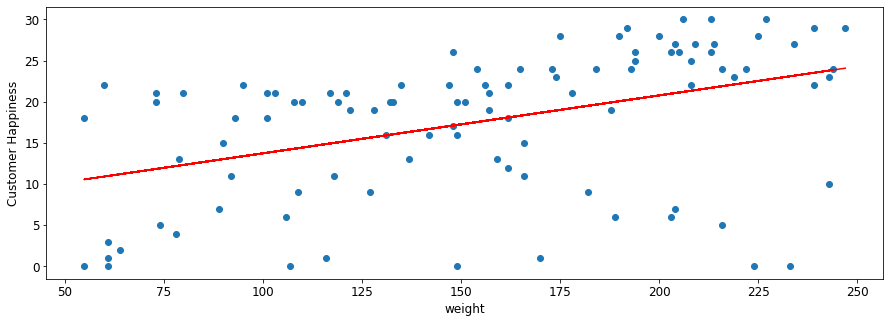

In [2]:
###
# REPLACE <addFeatureHere> BELOW WITH weight
###
formula = 'customer_happiness ~ weight'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

Customer happiness still increases with larger bars of chocolate. However, many data points (blue) are a long way from our trendline (red). This means that this line doesn't describe the data very well. It is likely that there are other features of the chocolate that are influencing customer happiness.

Repeat the above exercise, looking at `cocoa_percent` in place of `weight` and run the code again. You should see a similar trend.

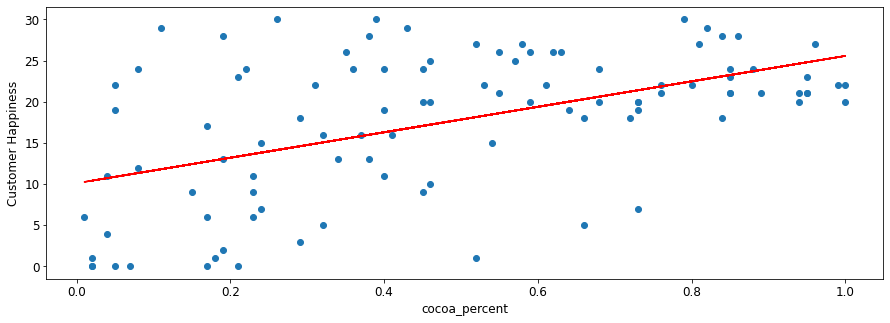

In [3]:
###
# REPLACE <addFeatureHere> BELOW WITH weight
###
formula = 'customer_happiness ~ cocoa_percent'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

Step 3
------

We can check how well our data fit by getting the R² values. These range between 0 - 1, where 1 is a perfect fit. What is a 'good' or 'bad' fit depends on several things, but for our purposes here numbers below ~0.3 will mean a poor fit.

Our linear model is saved under the name `lm`.

The linear model for simple linear regression we just ran, "weight vs. customer happiness", is saved under `lm`. Let's determine the R² value of this model. 

#### Print out the R² value of this model by replacing the text `<addFunctionCallHere>` with `rsquared` and then __run the code__.

In [4]:
###
# REPLACE <addFunctionCallHere> BELOW WITH rsquared TO PRINT THE R² VALUE
###
print(lm.rsquared)
###

0.2686562634619112


We have a value below 0.3, which means it is a poor fit.

Step 4
------

The problem with our chocolate bar survey is that the chocolate bar variables aren't controlled; cost, bar weight, and cocoa percent are different for every chocolate bar.

We want to see the relationship between cocoa content and customer happiness, but cost and block weight are also influencing customer happiness.

We *could* run another survey, giving away chocolate bars that are all the same weight for free (i.e. weight and cost are constant), and ask people how happy they are with the chocolate bar given varying percentages of cocoa. However, this would be expensive and time consuming.

__Alternatively, we can use multiple linear regression__. Multiple linear regression can give us the relationship between each _feature_ and customer happiness. These are provided as _coefficients_ (slopes). Positive numbers indicate a positive relationship (i.e. customer happiness increases as this feature increases), negative numbers indicate a negative relationship (customer happiness decreases as this feature increases). Unlike _simple_ linear regression, these relationships should be independent. That means that our relationship between cocoa content and customer happiness should not be influenced strongly by bar weight or cost. 

### Below, replace: 
#### 1. `<addCocoaPercentHere>` with `cocoa_percent` 
#### 2. `<addCostPercentHere>` with `cost`
### then __run the code__.

In [5]:
###
# IN THE LINE BELOW REPLACE <addCocoaPercentHere> WITH cocoa_percent AND <addCostPercentHere> WITH cost
###
formula = 'customer_happiness ~ weight + cocoa_percent + cost'
###

# This creates a new model with all three features
lm = smf.ols(formula = formula, data = dataset).fit()

# Print the coefficients (slopes) of our new model
print(lm.params)

print("R²: " + str(lm.rsquared))

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64
R²: 0.5554156557713101


If we inspect the table, we can see that `weight` and `cocoa_percent` are positive numbers, telling us they both independently increase customer happiness, but also that cost decreases it. 

The R² value is also much higher than before. This means model fits much better now.

Step 5
------

From our linear regression, we have an equation that predicts customer happiness. It looks like so:

`customer_happiness = -9.34 + weight * 0.106 + cocoa_percent * 31.9 + cost * -1.31`

We might also know that, for our company, the cost of manufacturing and shipping each bar can be calculated as:

`cost = (0.05 * weight + weight * cocoa_percent)^2 * 0.0004`

From this, we can calculate the best bar for our customers, by balancing the cost against how happy the customer is likely to be with this product.

Lets plots this in 3D to see what our optimum chocolate bar should be.

Below, complete the calculation for customer happiness.

#### Replace `<addThirdCoefHere>` and `<addFourthCoefHere>` as described in the comments and then __run the code__.

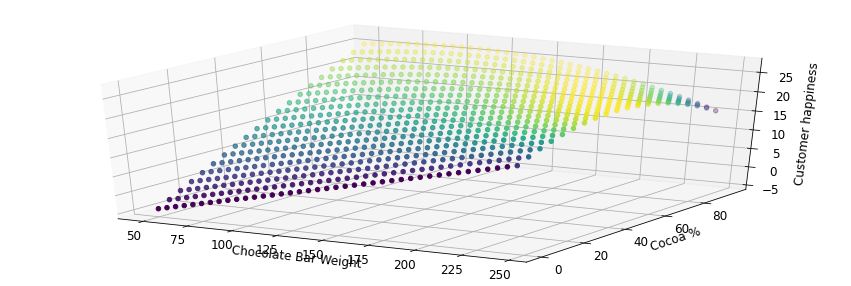

In [6]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def CalculateCustomerHappiness(weight, cocoa_percent):
    # This calculates the customer happiness for a given bar of chocolate
    cocoa_fraction = cocoa_percent / 100
    cost = (weight * 0.05 + weight * cocoa_fraction)**2 * 0.0004
    
    # First coefficient
    coeff_intercept = lm.params[0]
    
    # Second coefficient
    coeff_weight = lm.params[1]
    
    # Third coefficient
    coeff_cocoa = lm.params[2]
    
    # Fourth coefficient
    coeff_cost = lm.params[3]
    
    ### 
    # REPLACE THE <addThirdCoefHere> AND <addFourthCoefHere> BELOW WITH THE THIRD AND FOURTH COEFFICIENTS
    # YOU'LL FIND THEM JUST ABOVE THESE COMMENTS!
    # THE FIRST TWO HAVE ALREADY BEEN COMPLETED FOR YOU
    ###
    customer_happiness = (coeff_intercept) + (weight * coeff_weight) + (cocoa_fraction * coeff_cocoa) + (cost * coeff_cost)
    ###
    
    return customer_happiness
       
    
# Don't edit this part! This creates our graph.
def Graph3d():
    # This creates a 3D graph of likely customer happiness with different types of chocolate bar
    fig = graph.figure()
    ax = fig.add_subplot(111, projection='3d')

    cocoaPercentages=range(0,100,5)
    for weight in range(50,250,5):
        happiness=[]
        for cocoa in cocoaPercentages:
            happiness.append(CalculateCustomerHappiness(weight,cocoa))

        ax.scatter(np.full(len(happiness),weight), cocoaPercentages, happiness,c=happiness)

    ax.set_xlabel('Chocolate Bar Weight')
    ax.set_ylabel('Cocoa %')
    ax.set_zlabel('Customer happiness')

    graph.show()
    
Graph3d()

In the graph above, higher values in the graph (yellow) show higher customer happiness. We can see that our optimum bar should be around 100g and contain a high amount of cocoa. For large bars of chocolate, a cocoa content of around 50% appears to be ideal.

Note how this is different to our earlier work with _simple_ linear regression. With that, we assumed a large bar with very high amount of cocoa was what customers would want.

Conclusion
==========

That's it! You can go back to the course now and click on __'Next Step'__ to carry on with our introduction to regression.